# Trend Analysis
The objective of this repository is to provide a method to identify trends and supports as a human would do simply with fibonacci.

- Uptrend:
identify swing high and swing low.
put down the prices for the various retracements.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

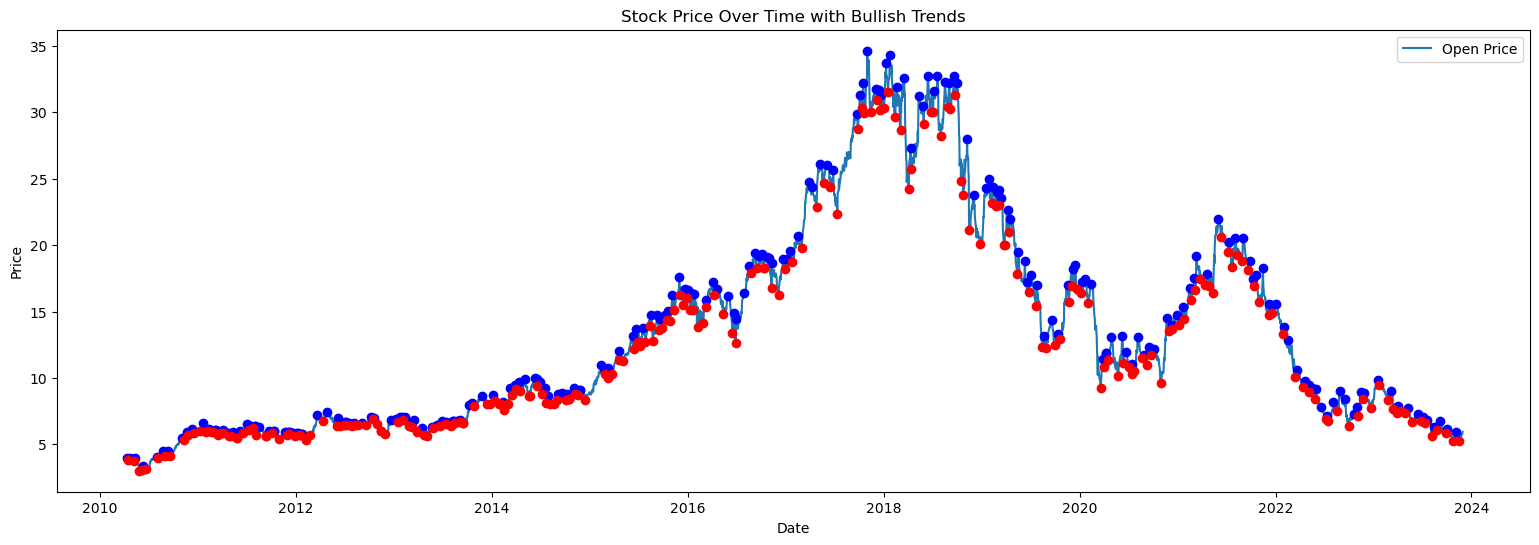

In [10]:
start = "2010-04-01"
end = "2023-12-31"
data = pd.read_csv('data/DAL.MI.csv', index_col=0, parse_dates=True)
data = data.loc[start:end]

min_range = 5

def find_local_minimums(data):
    """Check if the current point is a minimum over the 5-day window"""
    local_minimums = []
    for i in range(min_range, len(data) - min_range):  # Adjusting the range to avoid index errors
        if all(data.iloc[i] <= data.iloc[j] for j in range(i-min_range, i+min_range+1) if j != i):
            local_minimums.append(i)
    return local_minimums

def find_local_maximums(data):
    """Check if the current point is a maximum over the 5-day window"""
    local_maximums = []
    for i in range(min_range, len(data) - min_range):  # Adjusting the range to avoid index errors
        if all(data.iloc[i] >= data.iloc[j] for j in range(i-min_range, i+min_range+1) if j != i):
            local_maximums.append(i)
    return local_maximums


minimums = find_local_minimums(data['Open'])
maximums = find_local_maximums(data['Open'])

plt.figure(figsize=(19, 6))
plt.plot(data['Open'], label='Open Price')

# Plotting minimums and maximums
for index in maximums:
    plt.plot(data.index[index], data['Open'].iloc[index], 'bo')  # Blue dots for maximums
for index in minimums:
    plt.plot(data.index[index], data['Open'].iloc[index], 'ro')  # Red dots for minimums

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time with Bullish Trends')
plt.legend()
plt.show()

In [11]:
data['feature'] = 'def'

for index in minimums:
    data.at[data.index[index], 'feature'] = 'min'

for index in maximums:
    data.at[data.index[index], 'feature'] = 'max'

In [12]:
count_max = 0
count_min = 0
count_def = 0

for el in data['feature']:
    if (el == 'max'):
        count_max = count_max+1
    elif (el == 'min'):
        count_min = count_min+1
    elif (el == 'def'):
        count_def = count_def+1

print(f"count_max: {count_max} count_min: {count_min} count_def: {count_def}")

count_max: 230 count_min: 233 count_def: 3013


In [13]:
data.to_csv('data/DAL.MI_f.csv')